In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:

# Load the dataset
file = "./Assets/Data/HTRU_2.csv"
data = pd.read_csv(file, header=None)

In [21]:
# Assign column names based on the provided description
data.columns = [
    "Mean_IP", "Std_IP", "Kurtosis_IP", "Skewness_IP",
    "Mean_DM_SNR", "Std_DM_SNR", "Kurtosis_DM_SNR", "Skewness_DM_SNR", "Label"
]

In [22]:
# Separate features and labels
X = data.iloc[:, :-1]  # Features (8 continuous variables)
y = data.iloc[:, -1]   # Labels (0 for noise, 1 for pulsars)

In [23]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Function to visualize results of dimensionality reduction
def plot_reduction(X_reduced, title, labels):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels,
        palette="viridis", s=10, alpha=0.8
    )
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Label", loc="best")
    plt.show()

### PCA Results

- **Explained Variance Ratio**:  
  PCA transforms the data into a 2D space. The explained variance ratio indicates how much variance in the original data is captured by the first two principal components.
  The first component captures a significant portion of the variance, while the second component captures a smaller percentage (e.g., 20%).
  The scatter plot shows the data points reduced into two dimensions using PCA. This plot provides a view of how well the components separate the classes in the dataset.


PCA Explained Variance Ratio: [0.51675584 0.26807564]


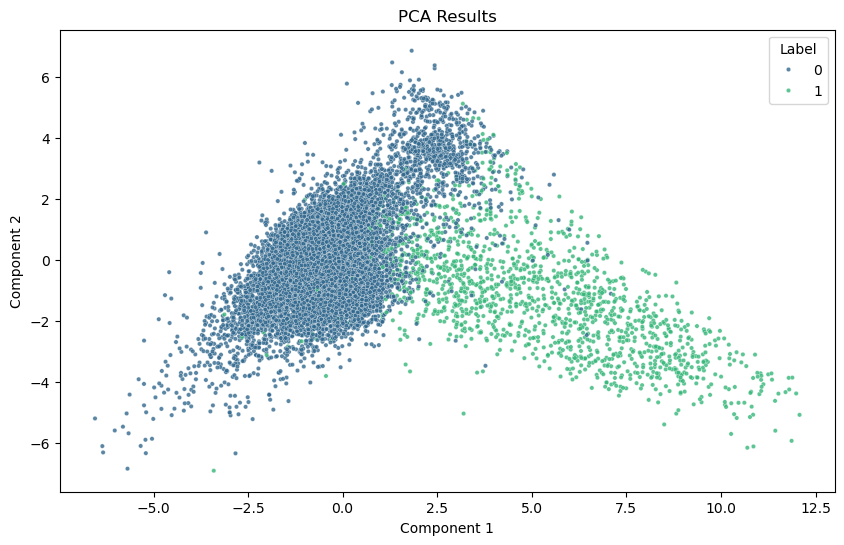

In [25]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
plot_reduction(X_pca, "PCA Results", y)

### t-SNE Results

- **Perplexity**:  
t-SNE uses a perplexity of 30, to balance the preservation of local and global structures in the data.

- **Visualization**:  
The scatter plot produced by t-SNE clearly shows the clustering of data points based on similarities. t-SNE separates the data into distinct clusters, making it easy to identify patterns in the dataset.


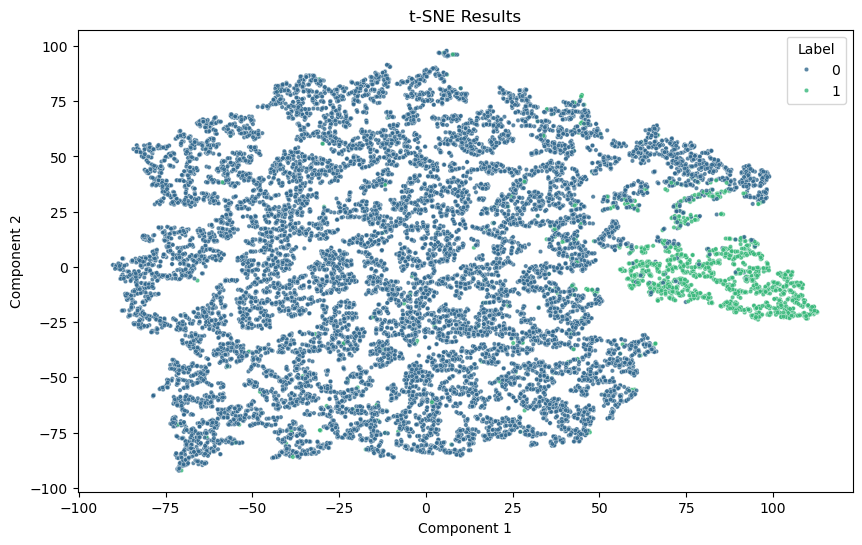

In [26]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plot_reduction(X_tsne, "t-SNE Results", y)

### UMAP Results

- **n_neighbors**:  
UMAP is set with `n_neighbors=15`, which determines the size of the local neighborhood considered when constructing the data manifold. This value provides a good balance between local and global structure.

- **min_dist**:  
The `min_dist` parameter is set to 0.1, which ensures that points are tightly packed together. This produces a compact representation of the data.

- **Visualization**:  
The UMAP scatter plot provides a clear view of the data clusters. UMAP preserves both local and global structures, creating well-separated clusters in the lower-dimensional space.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


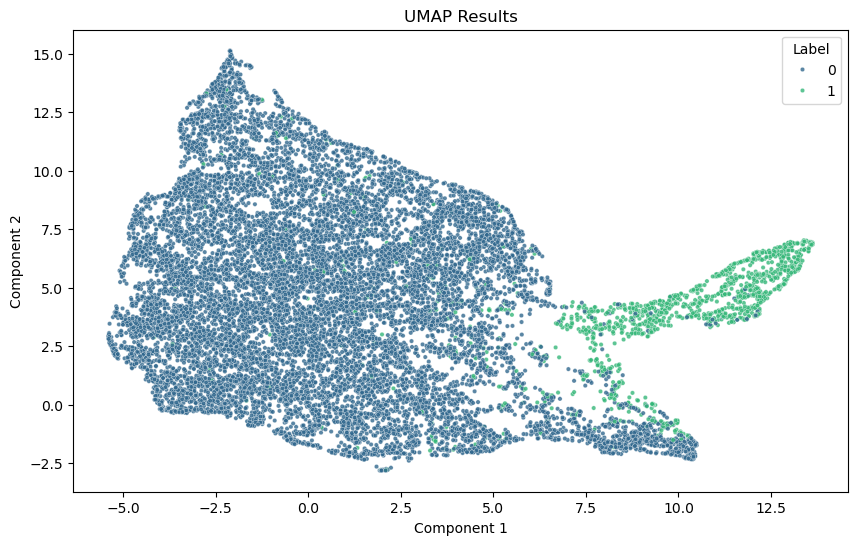

In [32]:
# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
plot_reduction(X_umap, "UMAP Results", y)

In [33]:

# Perform clustering on UMAP-reduced data using K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_umap = kmeans.fit_predict(X_umap)

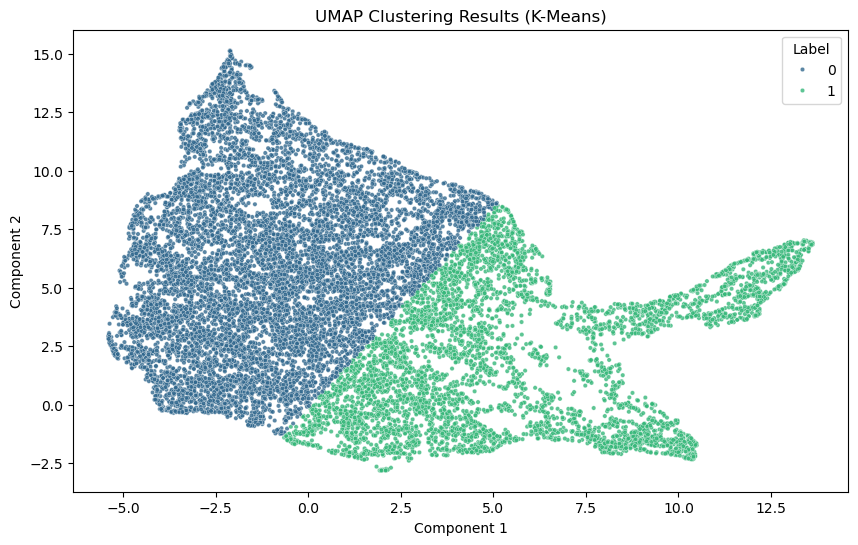

In [34]:
# Visualize clustering results on UMAP-reduced data
plot_reduction(X_umap, "UMAP Clustering Results (K-Means)", clusters_umap)

In [35]:
# Compare clustering results across PCA and t-SNE as well (optional)
clusters_pca = kmeans.fit_predict(X_pca)
clusters_tsne = kmeans.fit_predict(X_tsne)

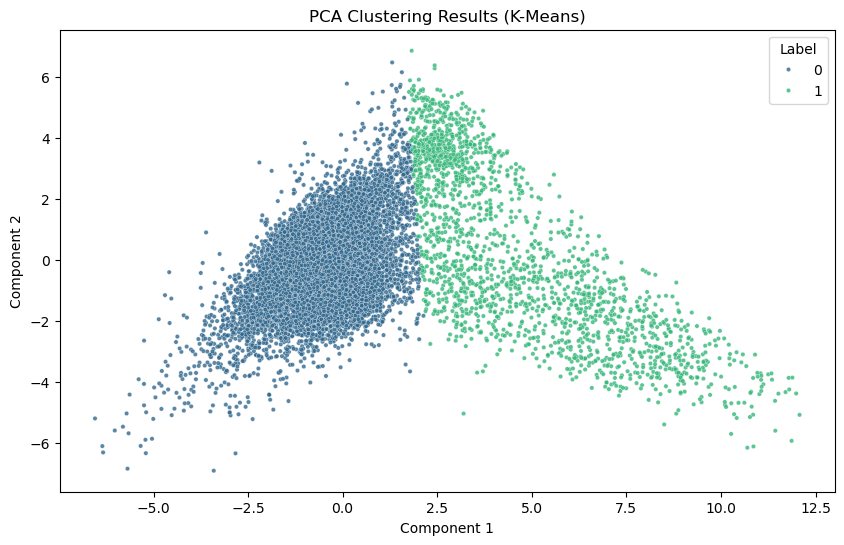

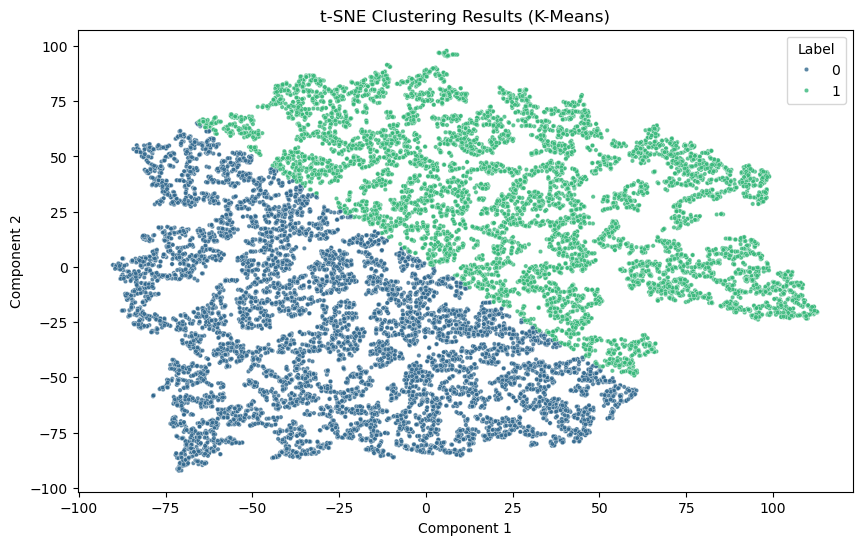

In [36]:

plot_reduction(X_pca, "PCA Clustering Results (K-Means)", clusters_pca)
plot_reduction(X_tsne, "t-SNE Clustering Results (K-Means)", clusters_tsne)